In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [4]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [5]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

torch.Size([28, 28])


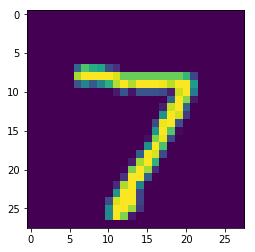

In [6]:
img = test_dataset[0][0][0]
print(img.shape)
plt.imshow(img)

In [7]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [8]:
def print_prediction():
    img = test_dataset[0][0].reshape(-1, 28*28)
    print(img.shape)
    output = model(img.to(device))
    print(output)
    _, predicted = torch.max(output.data, 1)

    print("--------")
    print("Prediction for the MNIST 7 image : %d" % predicted.cpu().numpy()[0])
    
print_prediction()

torch.Size([1, 784])
tensor([[-0.0941, -0.0191,  0.0056,  0.0033,  0.0465,  0.0292,  0.1823, -0.1060,
         -0.1077,  0.0097]], grad_fn=<AddmmBackward>)
--------
Prediction for the MNIST 7 image : 6


In [9]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
def print_accuracy():
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))
        
print_accuracy()

Accuracy of the network on the 10000 test images: 10.0 %


In [11]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

KeyboardInterrupt: 

In [68]:
print_accuracy()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Accuracy of the network on the 10000 test images: 97.94 %


In [72]:
print_prediction()

torch.Size([1, 784])
tensor([[ -5.4498,  -9.3333,  -2.2420,   1.1746, -14.4034,  -6.2126, -18.5642,
           9.3015,  -3.5639,  -1.5182]], device='cuda:0',
       grad_fn=<AddmmBackward>)
--------
Prediction for the MNIST 7 image : 7
